In [50]:
import notebook_util
import cv2
from matplotlib import pyplot as plt
import numpy as np
notebook_util.override_imshow(cv2)

%matplotlib inline

In [22]:
bgr_cake_data = cv2.imread("./resources/cake2.jpg")

**OpenCV will give us a numpy array with a Blue->Green->Red channel order**

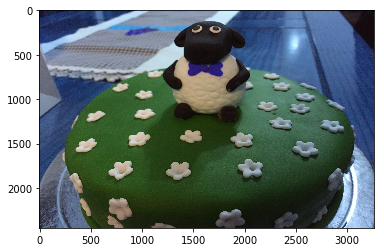

In [47]:
#using pyplot we have the colors wrong
plt.imshow(bgr_cake_data, aspect="auto")
plt.show()

**but OpenCV also allows us to convert between channel orderings...**

In [33]:
rgb_cake_data = cv2.cvtColor(bgr_cake_data, cv2.COLOR_BGR2RGB)

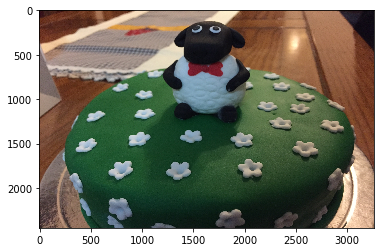

In [43]:
plt.imshow(rgb_cake_data, aspect="auto")
plt.show()

**...and channel spaces**

In [48]:
grayscale_cake_data = cv2.cvtColor(bgr_cake_data, cv2.COLOR_BGR2GRAY)
grayscale_cake_data2 = cv2.cvtColor(rgb_cake_data, cv2.COLOR_BGR2GRAY)

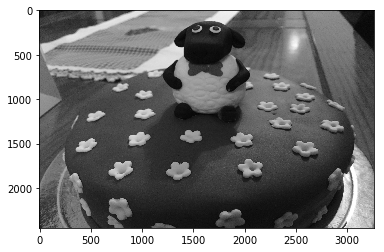

In [49]:
plt.imshow(grayscale_cake_data, aspect="auto", cmap="gray")
plt.show()

Using a grayscaled image from bgr or rgb orderings results in similiar grayscaled images, but they are not exactly the same. 

Each channel is given a different wheight when calculating the aggregated final value.

Showing Image: Grayscaled BGR>GRAY


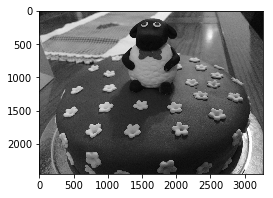

Showing Image: Grayscaled RGB>GRAY


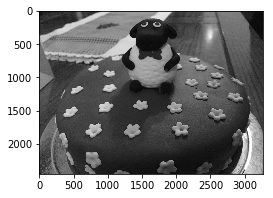

All pixels are equal?
 > False


In [93]:
cv2.imshow("Grayscaled BGR>GRAY", grayscale_cake_data, (4,3))
cv2.imshow("Grayscaled RGB>GRAY", grayscale_cake_data2, (4,3))
print("All pixels are equal?\n > {}".format(np.all(np.equal(grayscale_cake_data, grayscale_cake_data2)), (4,3)))



We can (barely) notice that the cake is a bit brighter in the the second image


A lot of techniques used in CV make use of grayscaled images.
This makes it more of a little check we need to have to make sure we consistently use the same channel ordering in our processings.

One other note to remember is that single channel images are cheaper to process and store than fully channel images (with only 1 channel we lose some of the information).

And the grayscale conversions are themselves single channel images

In [69]:
print("BGR shape [width, height, channels]: {}".format(bgr_cake_data.shape))
print("RGB shape [width, height, channels]: {}".format(rgb_cake_data.shape))
print("GRAY shape [width, height]: {}".format(grayscale_cake_data.shape))
print("(the gray channel as only 2 dimension, we don't even have 'channel')")

BGR shape [width, height, channels]: (2448, 3264, 3)
RGB shape [width, height, channels]: (2448, 3264, 3)
GRAY shape [width, height]: (2448, 3264)
(the gray channel as only 2 dimension, we don't even have 'channel')



OpenCV also allows us to convert to many other color spaces. For instance, HSV.

Showing Image: Hue ('color') Channel


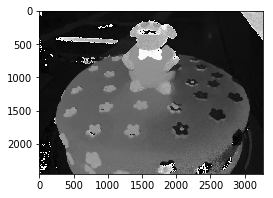

Showing Image: Satuaration ('intensity') Channel


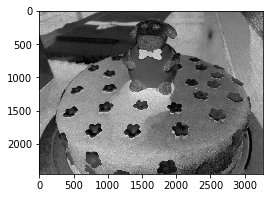

Showing Image: Value ('light') Channel


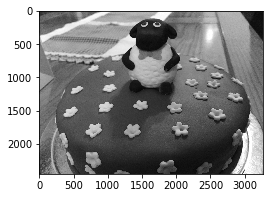

In [90]:
hsv_cake_data = cv2.cvtColor(bgr_cake_data, cv2.COLOR_BGR2HSV)

cv2.imshow("Hue ('color') Channel", hsv_cake_data[:,:,0], (4,3))
cv2.imshow("Satuaration ('intensity') Channel", hsv_cake_data[:,:,1], (4,3))
cv2.imshow("Value ('light') Channel", hsv_cake_data[:,:,2], (4,3))

We can also take single channel images and 'add' channels to them.

For instance, we can take each channel and create a new image with only that channel tone.

In [91]:
red_tone = np.zeros(rgb_cake_data.shape)
red_tone[:,:,2] = bgr_cake_data[:,:,2]

green_tone = np.zeros(rgb_cake_data.shape)
green_tone[:,:,1] = bgr_cake_data[:,:,1]

blue_tone = np.zeros(rgb_cake_data.shape)
blue_tone[:,:,0] = bgr_cake_data[:,:,0]

Showing Image: Red Tone


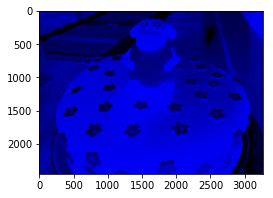

Showing Image: Green Tone


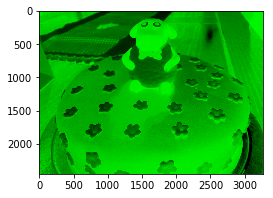

Showing Image: Blue Tone


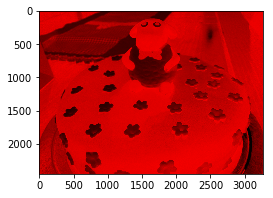

In [92]:
cv2.imshow("Red Tone", red_tone, (4,3))
cv2.imshow("Green Tone", green_tone, (4,3))
cv2.imshow("Blue Tone", blue_tone, (4,3))